In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

In [ ]:
dataset = pd.read_csv('DMP11_Dataset.csv')
feature_columns = ['Education_Illiterate', 'Education_Upto_primary', 'Education_Above_Primary_but_below_Higher_Secondary', 'Education_Higher_Secondary_&_above','Total_Juvenile_Crimes', 'Crime_Score']
X = dataset[feature_columns].values
y = dataset['Required_Awarenss_Level'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifiersvc = SVC(kernel = 'linear',random_state=0)
classifiersvc.fit(X_train, y_train)
y_predsvc = classifiersvc.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierrf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=42)
classifierrf.fit(X_train, y_train)
y_predrf = classifierrf.predict(X_test)

In [ ]:
classifierknn = KNeighborsClassifier(n_neighbors=5)
classifierknn.fit(X_train, y_train)
y_predknn = classifierknn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("This is for SVM.\n\n")
cmsvc = confusion_matrix(y_test, y_predsvc)
print(cmsvc)
print(classification_report(y_test, y_predsvc))
accuracy = accuracy_score(y_test, y_predsvc)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print("\n\n")
print("This is for Random Forest Classification.\n\n")
cmrf = confusion_matrix(y_test, y_predrf)
print(cmrf)
print(classification_report(y_test, y_predrf))
accuracy = accuracy_score(y_test, y_predrf)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print("\n\n")
print("This is for KNN.\n\n")
cmknn = confusion_matrix(y_test, y_predknn)
print(cmknn)
print(classification_report(y_test, y_predknn))
accuracy = accuracy_score(y_test, y_predknn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print("\n\n")

This is for SVM.


[[19  0  1  0]
 [ 0  8  0 10]
 [ 0  2 10  0]
 [ 0  0  0 20]]
                                    precision    recall  f1-score   support

Alarmingly-High-Awareness-Required       1.00      0.95      0.97        20
        Focused-Awareness-Required       0.80      0.44      0.57        18
           High-Awareness-Required       0.91      0.83      0.87        12
        Relaxed-Awareness-Required       0.67      1.00      0.80        20

                          accuracy                           0.81        70
                         macro avg       0.84      0.81      0.80        70
                      weighted avg       0.84      0.81      0.80        70

Accuracy of our model is equal 81.43 %.



This is for Random Forest Classification.


[[19  0  1  0]
 [ 0 18  0  0]
 [ 0  0 12  0]
 [ 0  0  0 20]]
                                    precision    recall  f1-score   support

Alarmingly-High-Awareness-Required       1.00      0.95      0.97        20
        

This is for KNN




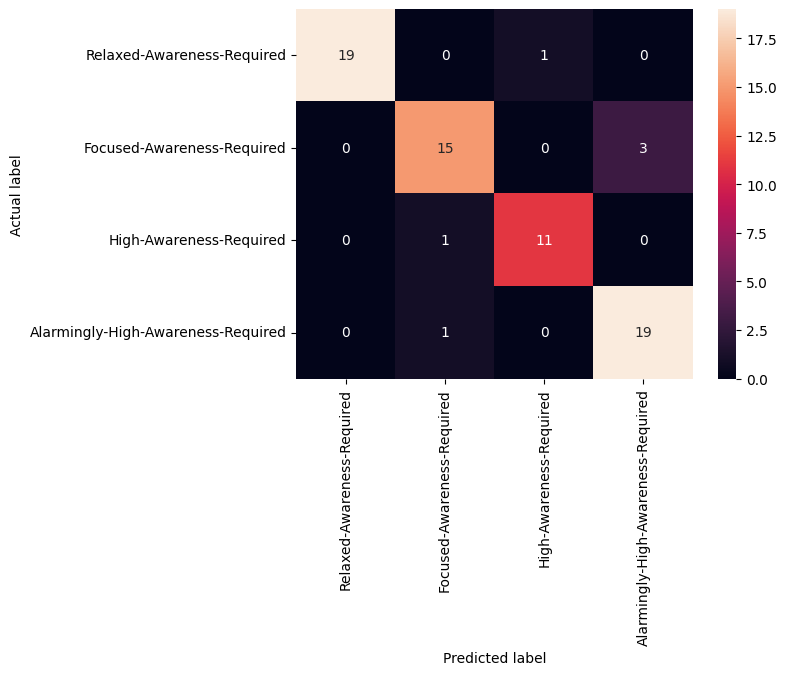




This is for Random Forest Classification




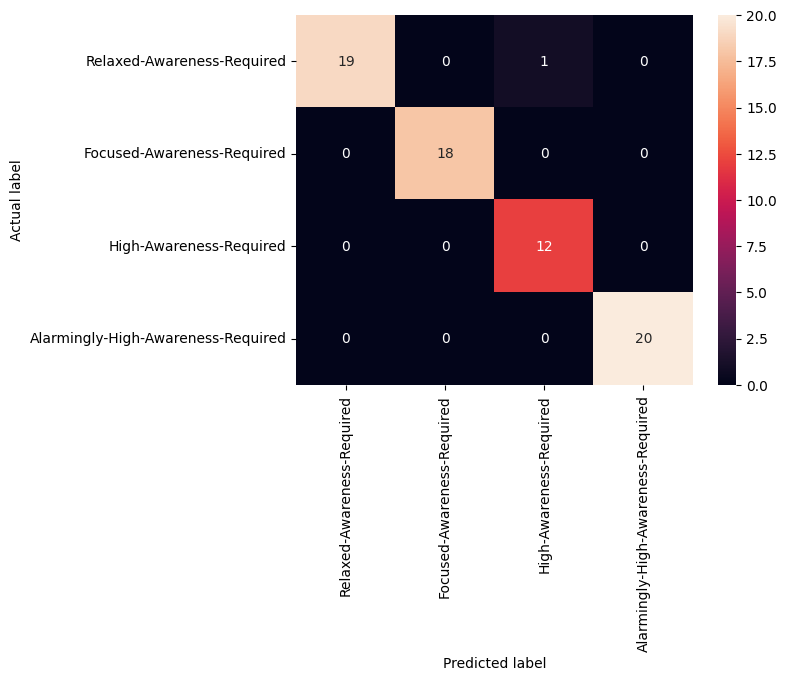




This is for Random Forest Classification




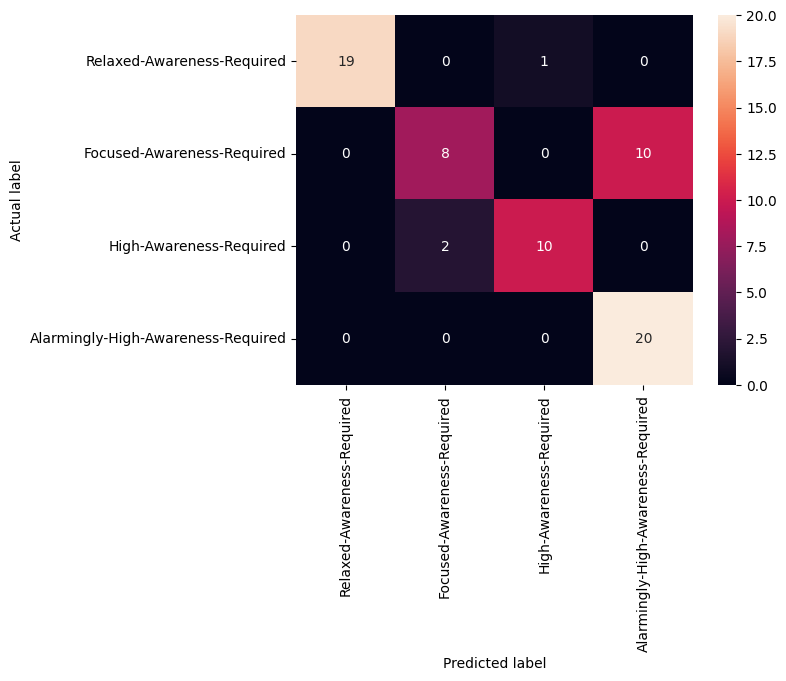

In [ ]:
print("This is for KNN Classifier\n\n")
plt.rcParams.update(plt.rcParamsDefault)
cmknn_df = pd.DataFrame(cmknn,
                     index = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'], 
                     columns = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'])

sns.heatmap(cmknn_df, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\n\n")

print("This is for Random Forest Classifier\n\n")
plt.rcParams.update(plt.rcParamsDefault)
cmrf_df = pd.DataFrame(cmrf,
                     index = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'], 
                     columns = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'])

sns.heatmap(cmrf_df, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\n\n")

print("This is for SVM Classifier\n\n")
plt.rcParams.update(plt.rcParamsDefault)
cmsvc_df = pd.DataFrame(cmsvc,
                     index = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'], 
                     columns = ['Relaxed-Awareness-Required', 'Focused-Awareness-Required', 'High-Awareness-Required', 'Alarmingly-High-Awareness-Required'])

sns.heatmap(cmsvc_df, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\n\n")